In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for plotting the Data
import matplotlib.pyplot as plt # For giving the details
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porter-delivery-time-estimation/dataset.csv


In [2]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [4]:
# checking whether the null values for last columns are in the same rows
df[df.total_onshift_partners.isnull() & df.total_busy_partners.isnull() & df.total_outstanding_orders.isnull()].shape

(16262, 14)

- Null values are less than the 10 percent of the size of whole dataset so its better to drop then replacing

In [5]:
df.dropna(inplace=True)

In [6]:
# changing the Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   created_at                176248 non-null  object 
 2   actual_delivery_time      176248 non-null  object 
 3   store_id                  176248 non-null  object 
 4   store_primary_category    176248 non-null  object 
 5   order_protocol            176248 non-null  float64
 6   total_items               176248 non-null  int64  
 7   subtotal                  176248 non-null  int64  
 8   num_distinct_items        176248 non-null  int64  
 9   min_item_price            176248 non-null  int64  
 10  max_item_price            176248 non-null  int64  
 11  total_onshift_partners    176248 non-null  float64
 12  total_busy_partners       176248 non-null  float64
 13  total_outstanding_orders  176248 non-null  f

- There is a need to convert Time into datetime format for further processing

In [7]:
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)
df['Available_delivery_Time_seconds'] = (df.actual_delivery_time - df.created_at).dt.total_seconds().astype('int64')
df[['actual_delivery_time','created_at','Available_delivery_Time_seconds']].head()

,actual_delivery_time,created_at,Available_delivery_Time_seconds
0,2015-02-06 23:27:16,2015-02-06 22:24:17,3779
1,2015-02-10 22:56:29,2015-02-10 21:49:25,4024
8,2015-02-16 00:38:01,2015-02-16 00:11:35,1586
14,2015-02-12 04:14:39,2015-02-12 03:36:46,2273
15,2015-01-27 03:02:24,2015-01-27 02:12:36,2988


- Its time to check how the availble delivery time related to other features

<AxesSubplot:>

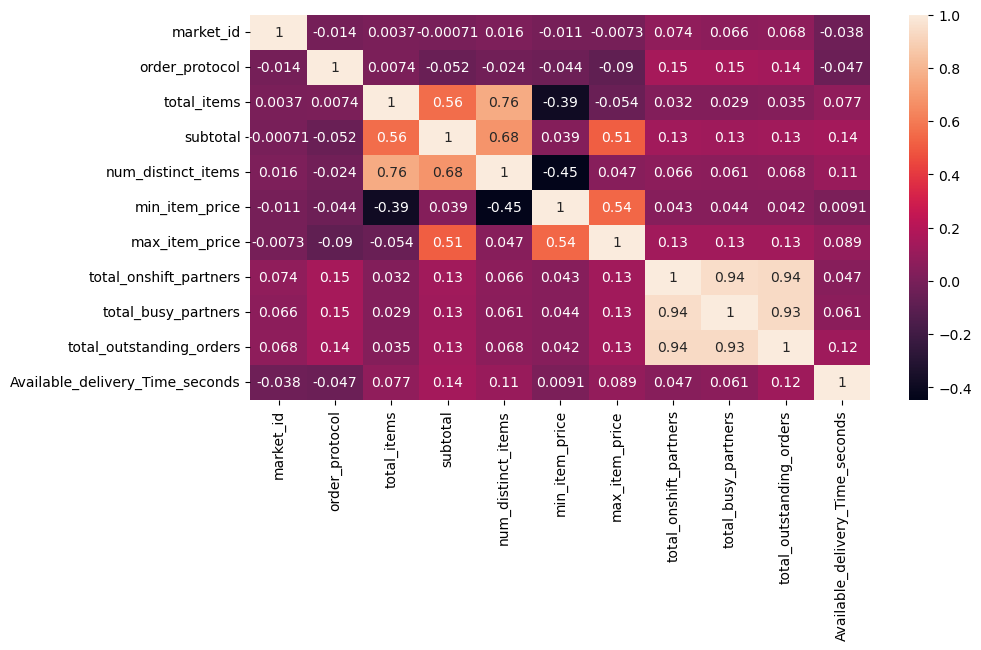

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [9]:
# There is no need to use the store ID
df.drop('store_id',axis=1,inplace=True)
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Available_delivery_Time_seconds
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,3779
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,4024
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,1586
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,2273
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,2988


In [10]:
# let's just check the cardinality of columns to seperate numerical with categorical

print(df.nunique())
print(df.info())

market_id                               6
created_at                         163082
actual_delivery_time               160686
store_primary_category                 73
order_protocol                          7
total_items                            54
subtotal                             8189
num_distinct_items                     20
min_item_price                       2251
max_item_price                       2586
total_onshift_partners                172
total_busy_partners                   158
total_outstanding_orders              281
Available_delivery_Time_seconds      6984
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   market_id                        176248 non-null  float64       
 1   created_at                       176248 non-null  datetime64[ns]
 2   act

- There is a need to treat market_id as well as store primary category as categorical


In [11]:
df.store_primary_category = df.store_primary_category.astype('object')
df.market_id = df.market_id.astype('object')
df.order_protocol = df.order_protocol.astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   market_id                        176248 non-null  object        
 1   created_at                       176248 non-null  datetime64[ns]
 2   actual_delivery_time             176248 non-null  datetime64[ns]
 3   store_primary_category           176248 non-null  object        
 4   order_protocol                   176248 non-null  object        
 5   total_items                      176248 non-null  int64         
 6   subtotal                         176248 non-null  int64         
 7   num_distinct_items               176248 non-null  int64         
 8   min_item_price                   176248 non-null  int64         
 9   max_item_price                   176248 non-null  int64         
 10  total_onshift_partners           176248 non-

In [13]:
df1 = df.select_dtypes(include=['int64','float64'])
df1.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Available_delivery_Time_seconds
0,4,3441,4,557,1239,33.0,14.0,21.0,3779
1,1,1900,1,1400,1400,1.0,2.0,2.0,4024
8,4,4771,3,820,1604,8.0,6.0,18.0,1586
14,1,1525,1,1525,1525,5.0,6.0,8.0,2273
15,2,3620,2,1425,2195,5.0,5.0,7.0,2988


In [14]:
X = df1.drop('Available_delivery_Time_seconds',axis=1)
X.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,4,3441,4,557,1239,33.0,14.0,21.0
1,1,1900,1,1400,1400,1.0,2.0,2.0
8,4,4771,3,820,1604,8.0,6.0,18.0
14,1,1525,1,1525,1525,5.0,6.0,8.0
15,2,3620,2,1425,2195,5.0,5.0,7.0


In [15]:
from sklearn.preprocessing import StandardScaler
st_scalar = StandardScaler()
df1_scaled = st_scalar.fit_transform(X)
df1_scaled = pd.DataFrame(df1_scaled,columns=X.columns)
df1_scaled['Available_delivery_Time_seconds'] = df1['Available_delivery_Time_seconds'].values
df1_scaled.head(10)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Available_delivery_Time_seconds
0,0.297472,0.407072,0.815360,-0.246077,0.141076,-0.344788,-0.865989,-0.705902,3779
1,-0.824488,-0.435503,-1.030166,1.375358,0.428175,-1.271537,-1.239188,-1.066377,4024
2,0.297472,1.134278,0.200185,0.259780,0.791952,-1.068811,-1.114788,-0.762819,1586
3,-0.824488,-0.640542,-1.030166,1.615784,0.651077,-1.155693,-1.114788,-0.952543,2273
4,-0.450502,0.504944,-0.414991,1.423443,1.845835,-1.155693,-1.145888,-0.971515,2988
5,-0.076515,0.972434,0.200185,0.461738,1.186044,-1.184654,-1.270287,-1.085349,5267
6,-0.076515,0.917757,0.200185,1.231102,0.829399,-1.126732,-1.176988,-1.047404,4976
7,-0.450502,0.247961,-0.414991,1.423443,1.007722,-1.184654,-1.021489,-0.876653,4296
8,-0.450502,-0.954936,-0.414991,-1.028905,-0.820080,-0.605436,-0.554991,-0.611040,3019
9,0.671459,-0.771767,0.200185,-1.028905,-1.355047,-0.952967,-0.897089,-0.895625,1733


<AxesSubplot:>

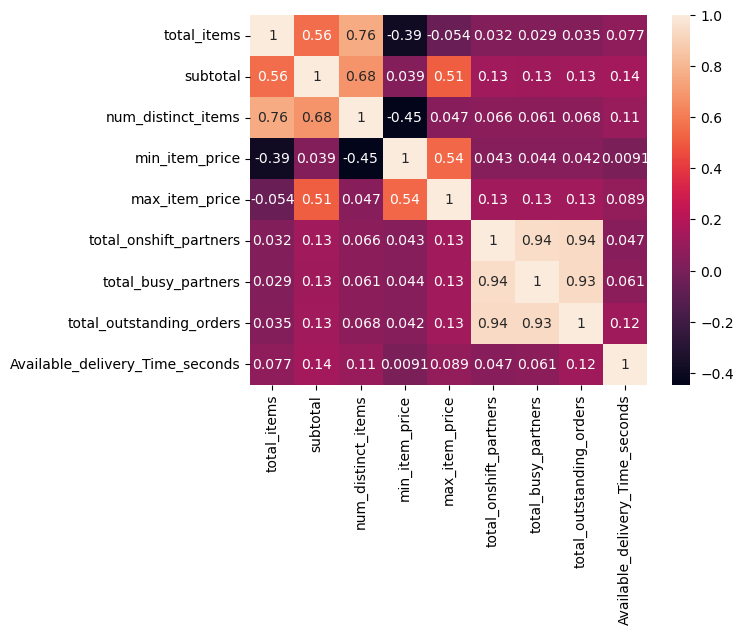

In [16]:
sns.heatmap(df1_scaled.corr(),annot=True)

In [17]:
# df1_scaled.pop("Available_delivery_Time_seconds")

In [18]:
df1_scaled.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'Available_delivery_Time_seconds'],
      dtype='object')

In [19]:
df1_scaled.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Available_delivery_Time_seconds
0,0.297472,0.407072,0.815360,-0.246077,0.141076,-0.344788,-0.865989,-0.705902,3779
1,-0.824488,-0.435503,-1.030166,1.375358,0.428175,-1.271537,-1.239188,-1.066377,4024
2,0.297472,1.134278,0.200185,0.259780,0.791952,-1.068811,-1.114788,-0.762819,1586
3,-0.824488,-0.640542,-1.030166,1.615784,0.651077,-1.155693,-1.114788,-0.952543,2273
4,-0.450502,0.504944,-0.414991,1.423443,1.845835,-1.155693,-1.145888,-0.971515,2988


In [20]:
df1_scaled.drop(columns = 'Available_delivery_Time_seconds')

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,0.297472,0.407072,0.815360,-0.246077,0.141076,-0.344788,-0.865989,-0.705902
1,-0.824488,-0.435503,-1.030166,1.375358,0.428175,-1.271537,-1.239188,-1.066377
2,0.297472,1.134278,0.200185,0.259780,0.791952,-1.068811,-1.114788,-0.762819
3,-0.824488,-0.640542,-1.030166,1.615784,0.651077,-1.155693,-1.114788,-0.952543
4,-0.450502,0.504944,-0.414991,1.423443,1.845835,-1.155693,-1.145888,-0.971515
...,...,...,...,...,...,...,...,...
176243,-0.076515,-0.714903,0.200185,-0.653840,-0.911025,-0.808162,-0.772690,-0.667957
176244,1.045445,0.171413,0.815360,-0.538435,-0.597178,-0.952967,-0.959289,-0.838708
176245,0.671459,-0.470496,0.200185,-0.740393,-1.356830,-0.171022,-0.026293,-0.345426
176246,-0.824488,-0.831912,-1.030166,-0.288392,-1.114312,-1.097771,-1.083688,-0.876653


In [21]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
reg = BayesianRidge()
X = df1_scaled.drop(columns='Available_delivery_Time_seconds')
y = df1_scaled['Available_delivery_Time_seconds']
print(cross_val_score(reg, X, y, cv=5))

[0.05100615 0.14267019 0.12691425 0.15739447 0.035449  ]
